In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:

def BinaryMatrixGenerator(S, C):
    """
    Binary matrix with fixed size and connectance;

    INPUT
    - S (float): species number;
    - C (float): connectance;

    OUTPUT
    - M (SxS array): binary matrix
    """

    boolMat = np.random.uniform(0, 1, size=(S, S))
    M = (boolMat < C).astype(int)
    # tr_diag=np.tril(M)
    # tr=np.tril(M,k=-1)
    # trans=tr.transpose()
    M = np.tril(M, k=-1).transpose()+np.tril(M)
    return(M)

def change_main_diagonal_to_value(matrix,value):
    for i in range(len(matrix)):
        matrix[i][i] = value
    return matrix


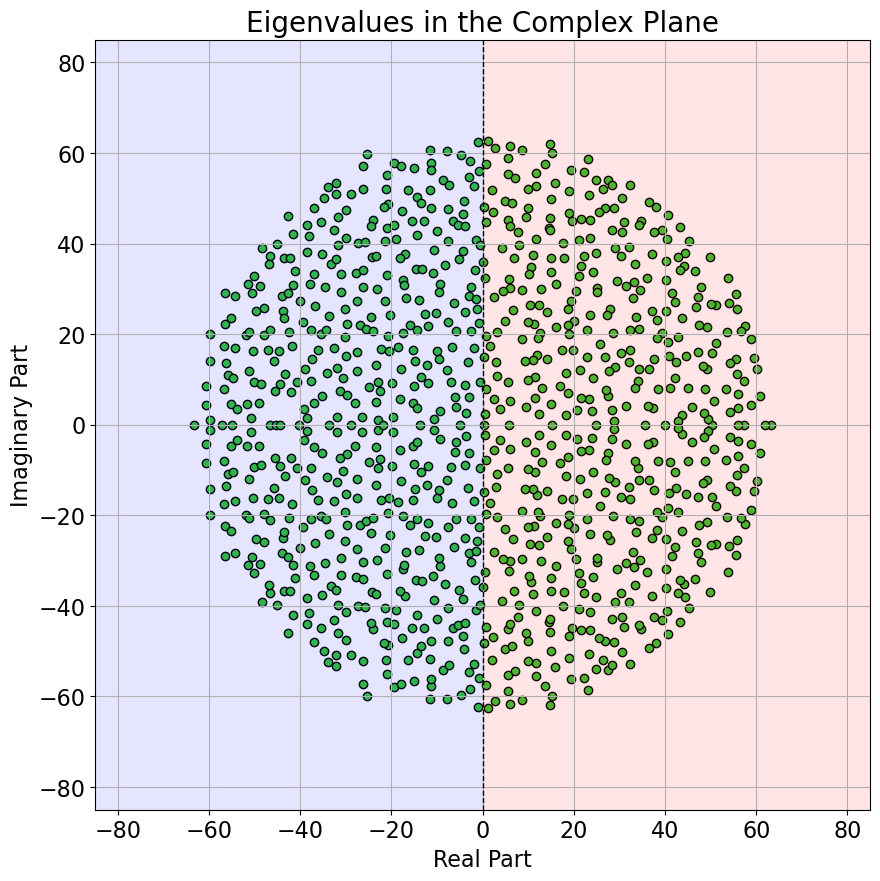

In [28]:
# Set the number of communities, nodes, mean, and standard deviation
C = 0.8  # Number of communities
S = 1000  # Number of nodes
mu = -20 # Mean for random interaction strengths
sigma = 2 # Standard deviation for random interaction strengths
# Generate a binary matrix with dimensions (S, C)


# Generate a S*S matrix of random interaction strengths with the given mean and standard deviation 
W = np.random.normal(mu, sigma, size=(S,S)) 

#W=change_main_diagonal_to_value(W,-20)

# Compute the eigenvalues of the community matrix M
eigenvalues = np.linalg.eigvals(W)

# Create a plot to display eigenvalues in the complex plane
fig, ax = plt.subplots(figsize=(10, 10))

#Scatter positive real eigenvalues with red
ax.scatter(eigenvalues.real[eigenvalues.real > 0], eigenvalues.imag[eigenvalues.real > 0], color="limegreen", edgecolor="black")  # Plot eigenvalues as red circles
#Scatter negative real eigenvalues with blue
ax.scatter(eigenvalues.real[eigenvalues.real < 0], eigenvalues.imag[eigenvalues.real < 0], color="limegreen", edgecolor="black")  # Plot eigenvalues as red circles
#Scatter zero real eigenvalues with green
ax.scatter(eigenvalues.real[eigenvalues.real == 0], eigenvalues.imag[eigenvalues.real == 0], color="limegreen", edgecolor="black")  # Plot eigenvalues as red circles

ax.set_xlabel('Real Part', fontsize=16)  # Set x-axis label
ax.set_ylabel('Imaginary Part', fontsize=16)  # Set y-axis label
ax.set_title('Eigenvalues in the Complex Plane', fontsize=20)  # Set plot title
#bigger ticks
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)


# Set the facecolor of the figure to white and the axes background to light gray
#fig.patch.set_facecolor('white')
#ax.set_facecolor('whitesmoke')

#vline at x=0
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)

#set 2 facecolor: x>0 red backgorund, x<0 blue background
ax.axvspan(0, 200, facecolor='red', alpha=0.1)
ax.axvspan(-200, 0, facecolor='blue', alpha=0.1)
#set axis limits
ax.set_xlim(-85, 85)
ax.set_ylim(-85, +85)

# Add grid lines to the plot
plt.grid(True)



Binary matrix with S= 5000  and C= 0.8 performed with a random uniform distribution with parameters mu= 0  and sigma= 1


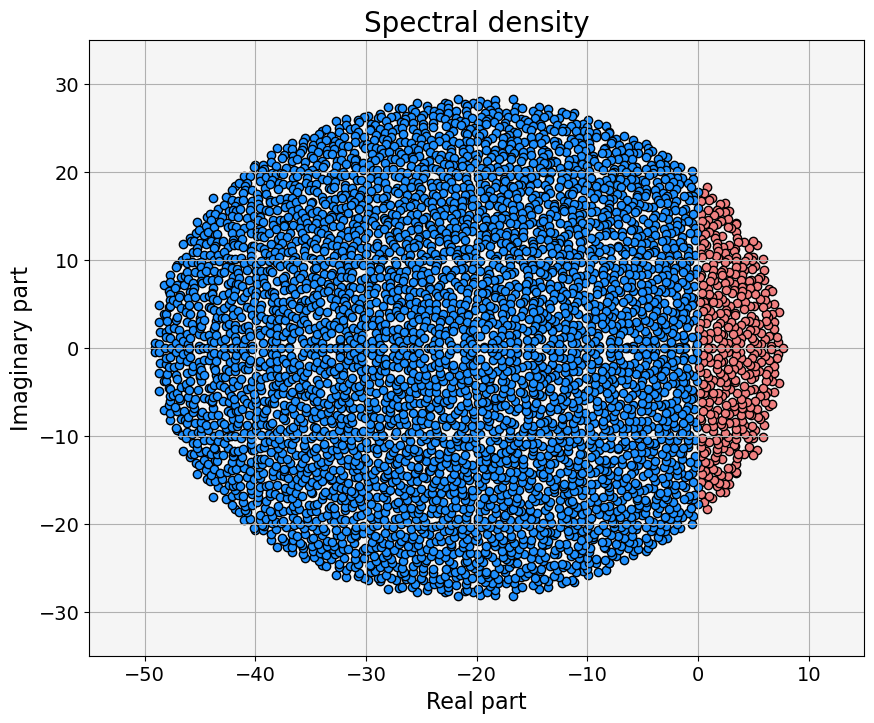

In [20]:
import numpy as np
from scipy import linalg as LA
from random import gauss
from math import sqrt
import matplotlib.pylab as plt

S=5000
#Non symmetric binary matrix
def BinaryMatrixGenerator(S, C):
    """
    Binary matrix with fixed size and connectance;

    INPUT
    - S (float): species number;
    - C (float): connectance;

    OUTPUT
    - M (SxS array): binary matrix
    """

    boolMat = np.random.uniform(0, 1, size=(S, S))
    M = (boolMat < C).astype(int)
    #M = np.tril(M, k=-1).transpose()+np.tril(M)
    return(M)

B=BinaryMatrixGenerator(S, 0.8)
diag=-20
B=change_main_diagonal_to_value(B,diag)


evals = LA.eigvals(B) 

fig, ax = plt.subplots(figsize=(10, 8))
# plot the real and imaginary parts of the eigenvalues
#Scatter positive real eigenvalues with red
ax.scatter(evals.real[evals.real > 0], evals.imag[evals.real > 0], color="lightcoral", edgecolor="black")  # Plot eigenvalues as red circles
#Scatter negative real eigenvalues with blue
ax.scatter(evals.real[evals.real < 0], evals.imag[evals.real < 0], color="dodgerblue", edgecolor="black")  # Plot eigenvalues as red circles

ax.grid(zorder=1)
# set the facecolor of the figure to white and the axes background to light gray
fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.set_xlim([diag-35,diag+35])
ax.set_ylim([-35,35])
# set the x and y labels
ax.set_xlabel('Real part',fontsize=16)
ax.set_ylabel('Imaginary part',fontsize=16)
#bigger ticks
ax.tick_params(axis='both', which='major', labelsize=14)
#title
ax.set_title('Spectral density',fontsize=20)

#print description of the matrix used to generate the eigenvalues
print("Binary matrix with S=",S," and C=",0.8,"performed with a random uniform distribution with parameters mu=",0," and sigma=",1)



Binary matrix with S= 5000  and C= 0.8 performed with a random uniform distribution with parameters mu= 0  and sigma= 1


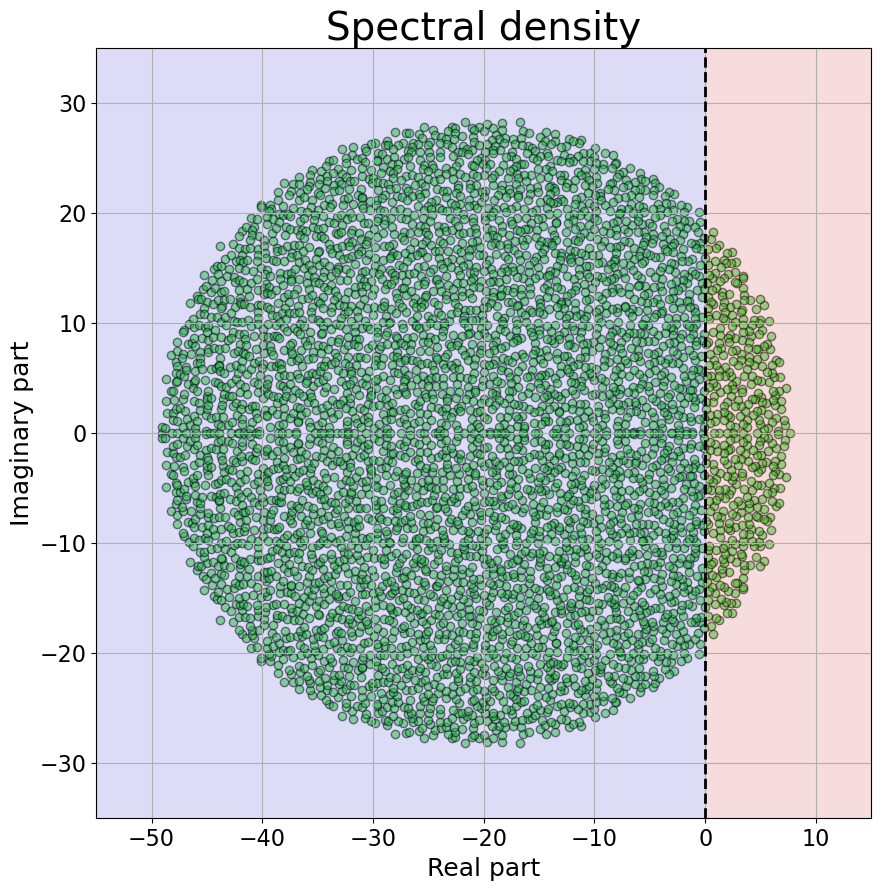

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
# plot the real and imaginary parts of the eigenvalues
#Scatter positive real eigenvalues with red
ax.scatter(evals.real[evals.real > 0], evals.imag[evals.real > 0], color="limegreen", edgecolor="black", alpha=0.5)  # Plot eigenvalues as red circles
#Scatter negative real eigenvalues with blue
ax.scatter(evals.real[evals.real < 0], evals.imag[evals.real < 0], color="limegreen", edgecolor="black", alpha=0.5)  # Plot eigenvalues as red circles

ax.grid(zorder=1)
# set the facecolor of the figure to white and the axes background to light gray
fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.set_xlim([diag-35,diag+35])
ax.set_ylim([-35,35])
# set the x and y labels
ax.set_xlabel('Real part',fontsize=18)
ax.set_ylabel('Imaginary part',fontsize=18)
#bigger ticks
ax.tick_params(axis='both', which='major', labelsize=16)
#title
ax.set_title('Spectral density',fontsize=28)
#vline at x=0
ax.axvline(x=0, color='black', linestyle='--', linewidth=2)

#set 2 facecolor: x>0 red backgorund, x<0 blue background
ax.axvspan(0, 100, facecolor='red', alpha=0.1)
ax.axvspan(-100, 0, facecolor='blue', alpha=0.1)



#print description of the matrix used to generate the eigenvalues
print("Binary matrix with S=",S," and C=",0.8,"performed with a random uniform distribution with parameters mu=",0," and sigma=",1)

